## Analyze A/B Test Results

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [2]:
#load data in df
df = pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the below cell to find the number of rows in the dataset.

In [3]:
print(len(df))

294478


c. The number of unique users in the dataset.

In [4]:
#return number of unique data for a selected column
print(df["user_id"].nunique())

290584


d. The proportion of users converted.

In [5]:
df_C=df[df['converted']==1]
print(len(df_C)/len(df))

0.11965919355605512


e. The number of times the `new_page` and `treatment` don't line up.

In [6]:
treatment_old = df.query("(group == 'treatment' and landing_page == 'old_page')").shape[0]
control_new = df.query("group == 'control' and landing_page == 'new_page'").shape[0]
treatment_old + control_new

3893

f. Do any of the rows have missing values?

In [7]:
#isnull --> check if the dataframe has any null values 
#values --> return dafaframe as array
#any --> return one True or one False for all data
df.isnull().values.any()

False

`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [8]:
df2 = pd.read_csv('ab_data.csv')
#update df2 if 'group' == 'treatment' keep only rows has 'landing_page' == 'new_page'
df2 = df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == True]
df2.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [9]:
#check if any data not required is exist
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [10]:
print(df2["user_id"].nunique())

290584


b. There is one **user_id** repeated in **df2**.  What is it?

In [11]:
#value_counts --> return unique rows and the number of repeated
df2.user_id.value_counts()[df2.user_id.value_counts()>1]

773192    2
Name: user_id, dtype: int64

c. What is the row information for the repeat **user_id**? 

In [12]:
df2[df2.user_id == 773192]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [13]:
#drop by index from previous question
df2 = df2.drop(1899)
df2[df2['user_id']==773192]

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [14]:
print(len(df2[df2['converted']==1])/len(df2))

0.11959708724499628


b. Given that an individual was in the `control` group, what is the probability they converted?

In [15]:
df2_c = df2[df2['group']=='control']
print(len(df2_c[df2_c['converted']==1])/len(df2_c))

0.1203863045004612


c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [16]:
df2_t = df2[df2['group']=='treatment']
print(len(df2_t[df2_t['converted']==1])/len(df2_t))

0.11880806551510564


d. What is the probability that an individual received the new page?

In [17]:
df2_n = df2[df2['landing_page']=='new_page']
print(len(df2_n)/len(df2))

0.5000619442226688


e. Consider your results from a. through d. above, and explain below whether you think there is sufficient evidence to say that the new treatment page leads to more conversions.

No.

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

#### NULL (**$H_{0}$**):

<span style="color: green;">The old page is better.</span>.

**$p_{old}$** >= **$p_{new}$**


#### ALTERNATIVE (**$H_{1}$**):

<span style="color: red;">The new page is better.</span>

**$p_{old}$** < **$p_{new}$**


`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **convert rate** for $p_{new}$ under the null? 

In [18]:
p_new = df2[df2['converted']==1].shape[0]/df2.shape[0]
p_new


0.11959708724499628

b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [19]:
p_old = df2[df2['converted']==1].shape[0]/df2.shape[0]
p_old


0.11959708724499628

c. What is $n_{new}$?

In [20]:
n_new = df2[df2['landing_page']=='new_page'].shape[0]
n_new

145310

d. What is $n_{old}$?

In [21]:
n_old = df2[df2['landing_page']=='old_page'].shape[0]
n_old

145274

e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [22]:
new_page_converted1 = np.random.binomial(1, p_new, n_new)

f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [23]:
old_page_converted1 = np.random.binomial(1, p_old, n_old)

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [24]:
new_page_converted1.mean() - old_page_converted1.mean()

-0.0005732040140850603

h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in a numpy array called **p_diffs**.

In [25]:

# Simulation via binomial distribution
p_diffs = []
new_converted_simulation = np.random.binomial(n_new, p_new, 10000)/n_new
old_converted_simulation = np.random.binomial(n_old, p_old, 10000)/n_old
p_diffs = new_converted_simulation - old_converted_simulation
p_diffs = np.array(p_diffs)

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

<function matplotlib.pyplot.show(close=None, block=None)>

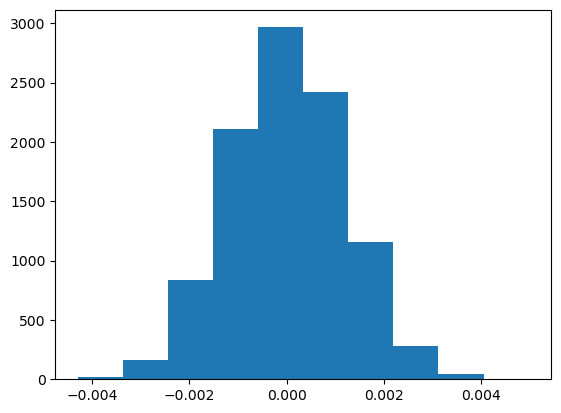

In [26]:
plt.hist(p_diffs)
plt.show

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [27]:
# We plot 10,000 data from the sampling distribution of the difference between the old page rate converted and new page rate converted
obs_diff = df2[df2['group'] == 'treatment']['converted'].mean() -  df2[df2['group'] == 'control']['converted'].mean()
(obs_diff < p_diffs).mean()

0.9096

k. In words, explain what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

**This is The our p-value. If we have a small p-value then the null is true.If we have a large p-value then the alternative is true.
The p-value is measured by the value of the confidence intervals. Where the confidence interval determines the value of the p-value and the Z-value. p-value here is so large. Therefore, we can't reject the null and suggest that the old page is better.**

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [28]:
import statsmodels.api as sm

convert_old = df2[(df2['landing_page'] == 'old_page') & (df2['converted'] == 1)].shape[0]
convert_new = df2[(df2['landing_page'] == 'new_page') & (df2['converted'] == 1)].shape[0]
n_old = df2[df2['landing_page'] == 'old_page'].shape[0]
n_new = df2[df2['landing_page'] == 'new_page'].shape[0]

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [29]:
z_score, p_value = sm.stats.proportions_ztest([convert_new, convert_old], [n_new, n_old], alternative = 'larger')
print(z_score, p_value)

-1.3109241984234394 0.9050583127590245


n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

**The p-value here is 0.1896 >  Our alpha is 0.05**

**The z-score is 1.31 < Our confidence interval is 1.96**

**That mean we can't reject the null hypothesis.**

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**Logistic regression.**

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [30]:
df2['ab_page'] = pd.get_dummies(df2['group'])['treatment']
df2['intercept'] = 1

c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [31]:
log_mod = sm.Logit(df2['converted'], df2[['intercept', 'ab_page']])
results = log_mod.fit()


Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [32]:
results.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Tue, 20 Sep 2022   Pseudo R-squ.:               8.077e-06
Time:                        18:08:51   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  

**the p_value of ab_page is 0.190. it same value approximately.**

# **IN PART II :**

#### NULL (**$H_{0}$**):

<span style="color: green;">The old page is better.</span>.

**$p_{old}$** >= **$p_{new}$**


#### ALTERNATIVE (**$H_{1}$**):

<span style="color: red;">The new page is better.</span>.

**$p_{old}$** < **$p_{new}$**


# **IN PART III :**

#### NULL (**$H_{0}$**):

<span style="color: green;">Difference not exists.</span>

**$p_{new}$** - **$p_{old}$** = 0


#### ALTERNATIVE (**$H_{1}$**):

<span style="color: red;">Difference exists.</span>.

**$p_{new}$** - **$p_{old}$** ≠ 0

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

**Yes, I think that additional factors might influence the individual converts. It will include more data that could be analyzed and get another conclusion. but maybe there live some disadvantages.**

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns.

In [33]:
countries_df = pd.read_csv('./countries.csv')
# here we joined our datasets by index 'user_id' and save it in df_new
df_new = countries_df.set_index('user_id').join(df2.set_index('user_id'), how='inner')
df_new.head()

,country,timestamp,group,landing_page,converted,ab_page,intercept
user_id,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,0,1
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,0,1
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1


In [34]:
# Create the necessary dummy variables
# We not need 'CA' because data if it weren't 'UK' or 'US', must be 'CA'
df_new[['UK', 'US']] = pd.get_dummies(df_new['country'])[['UK', 'US']]
# here we droped column 'country' because We not need it
# inplace=True --> for save data after droped in df_new
df_new.drop('country', axis=1, inplace=True)
df_new.head()


,timestamp,group,landing_page,converted,ab_page,intercept,UK,US
user_id,,,,,,,,
834778,2017-01-14 23:08:43.304998,control,old_page,0,0,1,1,0
928468,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,0,1
822059,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,1,0
711597,2017-01-22 03:14:24.763511,control,old_page,0,0,1,1,0
710616,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1,1,0


h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [35]:
### Fit Your Linear Model And Obtain the Results
df_new['ab_page_US'] = df_new['ab_page'] * df_new['US']
df_new['ab_page_UK'] = df_new['ab_page'] * df_new['UK']

logit_mod = sm.Logit(df_new['converted'], df_new[['intercept','ab_page','US','UK','ab_page_US','ab_page_UK']])
res2 = logit_mod.fit()
res2.summary()


Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290578
Method:                           MLE   Df Model:                            5
Date:                Tue, 20 Sep 2022   Pseudo R-squ.:               3.482e-05
Time:                        18:08:53   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1920
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0040      0.036    -55.008      0.000      -2.075      -1.933
ab_page       -0.0674      0.052     -1.297      0.195      -0.169       0.034
US             0.0175      0.038      0.465      0.642      -0.056       0.091
UK             0.0118      0.040      0.296      0.767      -0.066       0.090
ab_page_US     0.0469      0.054      0.872      0.383      -0.059       0.152
ab_page_UK     0.0783      0.057      1.378      0.168      -0.033       0.190
==============================================================================
"""

<a id='conclusions'></a>
## Conclusions

We can observe ***values of p*** through the three parts of the project didn't make us fail to reject the Null hypothesis. This means that the old page was much better than the new page.

Even when we used the users' countries, the new page was not better in any of those countries. Although the ***conversion rate is low***, reaching 12%, but the presence of the new page has not raised this rate.

I suppose the new page to offer something new to the user had to be more user-friendly and more visible and if that happened it would increase our conversion rate. This is indicated by the closeness of the conversion rates between the new and old page, and this means that users did not feel any difference and did not suffer from the shock of renewal.